In [1]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from scipy.cluster import hierarchy
from skimage import io
from collections import defaultdict
import numpy as np
import SPHC as sphc
import util as ut

In [2]:
imagePath = 'images/'
imageFiles = ['caneca1.jpg', 'caneca2.jpg', 'face1.jpg', 'face2.jpg', 'face3.jpg']

#SLIC Parameters:
numSegments = 500  # How many superpixels to start with - input for SLIC function

#SPHC Parameters:
segmentsToMerge =[400, 500]#  [70, 80, 90] #[100, 200, 300, 400, 480] #3 # How many superpixels to merge based on color similarity
distance_limit = 0.3 # Limits which segments get merged based on their difference in average color

In [ ]:
for file in imageFiles:
    image = img_as_float(io.imread((imagePath + file)))
    
    #segments = felzenszwalb(image, scale=200, sigma=0.5, min_size=20)
    segments = slic(image, slic_zero = True)
    
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    ax.imshow(mark_boundaries(image, segments))
    ax.set_title("SLIC's method")
    plt.show()

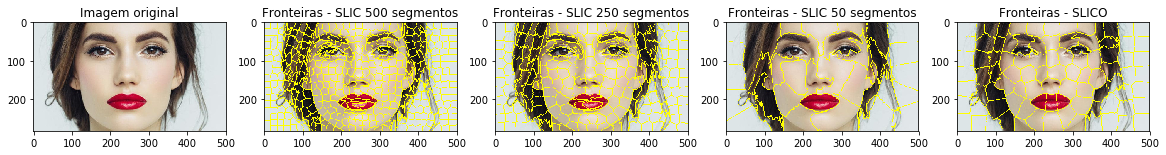

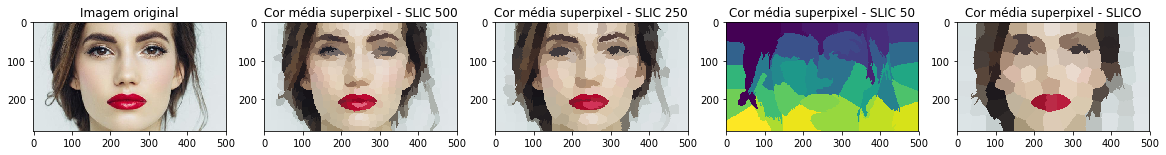

In [33]:
for file in imageFiles[2:3]:
    image = img_as_float(io.imread((imagePath + file)))
    
    #slic 500 segments
    seg_slic500 = slic(image, n_segments = 500, slic_zero = False)
    slic500 = ut.merge_superpixels_colors(image, seg_slic500)
    
    #slic 250 segments
    seg_slic250 = slic(image, n_segments = 250, slic_zero = False)
    slic250 = ut.merge_superpixels_colors(image, seg_slic250)
    
    #slic 50 segments
    seg_slic50 = slic(image, n_segments = 50, slic_zero = False)
    slic50 = ut.merge_superpixels_colors(image, seg_slic250)
    
    #slico image
    seg_slico = slic(image, slic_zero = True)
    slico = ut.merge_superpixels_colors(image, seg_slico)
    
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,20))
    ax1.imshow(image)
    ax2.imshow(mark_boundaries(image, seg_slic500))
    ax3.imshow(mark_boundaries(image, seg_slic250))
    ax4.imshow(mark_boundaries(image, seg_slic50))
    ax5.imshow(mark_boundaries(image, seg_slico))
    ax1.set_title("Imagem original")
    ax2.set_title("Fronteiras - SLIC 500 segmentos")
    ax3.set_title("Fronteiras - SLIC 250 segmentos")
    ax4.set_title("Fronteiras - SLIC 50 segmentos")
    ax5.set_title("Fronteiras - SLICO")
    plt.show()
    
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,20))
    ax1.imshow(image)
    ax2.imshow(slic500)
    ax3.imshow(slic250)
    ax4.imshow(seg_slic50)
    ax5.imshow(slico)
    ax1.set_title("Imagem original")
    ax2.set_title("Cor média superpixel - SLIC 500")
    ax3.set_title("Cor média superpixel - SLIC 250")
    ax4.set_title("Cor média superpixel - SLIC 50")
    ax5.set_title("Cor média superpixel - SLICO")
    plt.show()

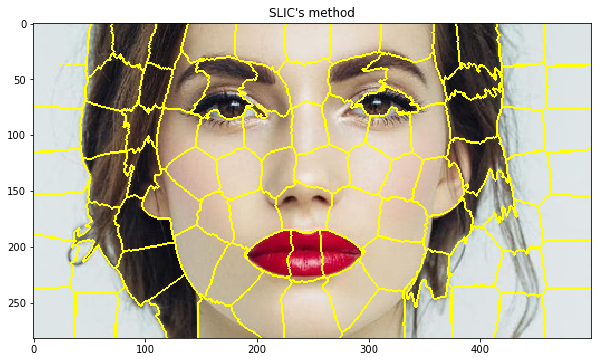

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(mark_boundaries(image, segments))
ax.set_title("SLIC's method")
plt.show()

In [ ]:
n_seg = 0

for segs in segments:
    curr_max = max(segs)
    if(curr_max > n_seg):
        n_seg = curr_max

n_seg += 1

In [ ]:
colors = [[.0, .0, .0] for x in range(n_seg)]
itens = [0 for x in range(n_seg)]
new_image = copy.deepcopy(image)

#replace colors
for i in range(len(segments)):
    for j in range(len(segments[i])):
        index = segments[i][j]
        colors[index] += image[i][j]
        itens[index] += 1
        
for i in range(len(itens)):
    if(itens[i] > 0):
        colors[i] = [x / itens[i] for x in colors[i]]
        
for i in range(len(segments)):
    for j in range(len(segments[i])):
        index = segments[i][j]
        new_image[i][j] = colors[index]
        
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.imshow(new_image)
ax.set_title("Superpixel color")
plt.show() 

In [ ]:
segm_size = n_seg - 10
segm_grid = sphc.getSPHCsegments(segments, image, numToMerge = segm_size, max_dist = distance_limit)

In [ ]:
fig = plt.figure("Segments", figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(image, segm_grid))
plt.axis("off")
plt.show()